In [2]:
import pandas as pd
#Importing all required libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

#Plotting Plots
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [5]:
import pandas as pd
df = pd.read_csv("/Users/Arjun D H/Documents/restaurant_data.csv",engine='python',encoding='utf-8')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7044: invalid continuation byte

In [3]:
df.head(5)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVz3Y-7h3D1zeR_xDAqm,2017-06-30T05:05:40Z,2019-05-01T15:43:09Z,4203 E Kiehl Ave,"Pizza,Restaurant,American restaurants,Pizza Pl...",Accommodation & Food Services,Sherwood,US,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,...,USD,"2018-05-01T04:25:37.197Z,2018-04-16T04:36:02.3...",NaN,Cheese Pizza,Shotgun Dans Pizza,72120,USD,0,25,AR
1,AVweGPFF_7pvs4fzAAzQ,2016-04-02T04:02:49Z,2019-05-01T15:27:50Z,25 E Camelback Rd,"Pizza,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,...,USD,"2018-03-03T02:38:06.381Z,2018-01-18T20:18:10.0...",NaN,Pizza Cookie,Sauce Pizza Wine,85012,USD,0,25,AZ
2,AVwdRGa9_7pvs4fz4E3K,2016-03-03T18:39:49Z,2019-05-01T12:52:25Z,3703 Paxton Ave,"Restaurant,Pizza Place,Restaurants",Accommodation & Food Services,Cincinnati,US,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,...,USD,"2018-04-10T07:58:34.585Z,2018-04-21T05:43:21.4...",a saucelessampcomma double cheese pizza with a...,Pizza Blanca,Mios Pizzeria,45209,USD,0,25,OH
3,AVwdX4psIN2L1WUfvJB1,2016-03-29T05:08:59Z,2019-05-01T12:52:20Z,30495 John R Rd,"Pizza,Carry-out food,Pizza Place,Restaurants",Accommodation & Food Services,Madison Heights,US,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,...,USD,"2016-10-20T21:50:02Z,2016-03-29T05:08:59Z",NaN,Small Pizza,Hungry Howies Pizza,48071,USD,25,40,MI
4,AVwdaeTtkufWRAb55pSH,2016-03-31T02:34:04Z,2019-05-01T12:50:45Z,3600 Eastern Ave,"Pizza,American restaurants,Pizza Place,Pizza e...",Accommodation & Food Services,Baltimore,US,us/md/baltimore/3600easternave/-1270965359,39.286630,...,USD,2016-03-31T02:34:04Z,NaN,Pizza Sub,Spartan Pizzeria,21224,USD,0,25,MD


In [4]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'menuPageURL', 'menus.amountMax', 'menus.amountMin', 'menus.currency',
       'menus.dateSeen', 'menus.description', 'menus.name', 'name',
       'postalCode', 'priceRangeCurrency', 'priceRangeMin', 'priceRangeMax',
       'province'],
      dtype='object')

In [5]:
df.isnull().sum()

id                       0
dateAdded                0
dateUpdated              0
address                  0
categories               0
primaryCategories        0
city                     0
country                  0
keys                     0
latitude                 0
longitude                0
menuPageURL           8321
menus.amountMax          0
menus.amountMin          0
menus.currency           0
menus.dateSeen           0
menus.description     6282
menus.name               0
name                     0
postalCode               4
priceRangeCurrency       0
priceRangeMin            0
priceRangeMax            0
province                 0
dtype: int64

In [6]:
df.shape

(10000, 24)

In [7]:
categories= df['categories'].dropna()

In [8]:
categories = categories.tolist()

In [9]:
print(len(categories))

10000


In [10]:
def findcity(city):
    requiredcity = []
    for i in city:
        if(city in i):
            requiredcity.append(i)
    return(len(requiredcity))  

In [11]:
findcity("Madison Heights")

0

In [12]:
top5categories = df['categories'].value_counts()
top5categories[0:5]

Restaurant,Pizza Place                      2690
Pizza Place                                 2209
Pizza,Restaurant,Pizza Place,Restaurants     370
Italian Restaurant,Pizza Place               312
Restaurant,Pizza Place,Restaurants           293
Name: categories, dtype: int64

In [13]:
top10primaryCategories = df['primaryCategories'].value_counts()
top10primaryCategories[0:10]

Accommodation & Food Services                                          9909
Management of Companies & Enterprises                                    43
Accommodation & Food Services,Management of Companies & Enterprises      23
Retail,Accommodation & Food Services                                     11
Retail                                                                    9
Wholesale Trade,Accommodation & Food Services                             2
Educational Services,Accommodation & Food Services                        2
Wholesale Trade,Accommodation & Food Services,Manufacturing               1
Name: primaryCategories, dtype: int64

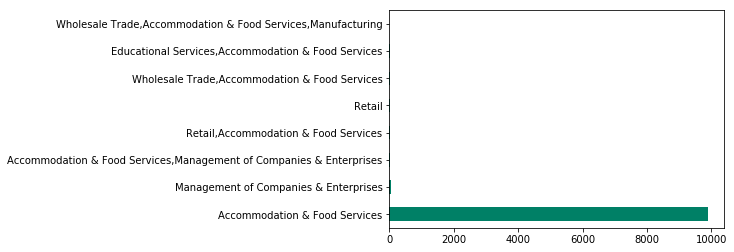

In [14]:
df['primaryCategories'].value_counts()[:10].plot(kind='barh',colormap='summer')

In [15]:
top5city = df['city'].value_counts()
top5city = top5city[0:5]
print(type(top5city))

<class 'pandas.core.series.Series'>


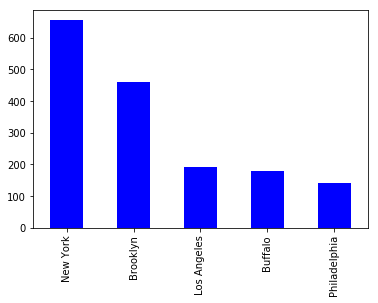

In [16]:
top5city.plot.bar(stacked=True, colormap='winter')

In [18]:
top5menus_name= df['menus.name'].value_counts()
top5menus_name[0:5]

Cheese Pizza             299
White Pizza              225
Hawaiian Pizza           149
Buffalo Chicken Pizza    112
Pizza                    111
Name: menus.name, dtype: int64

In [20]:
diffname= df['name'].dropna()

In [21]:
diffname.value_counts()

California Pizza Kitchen                    261
Papa Murphy's                               208
Papa John's Pizza                           124
Papa Murphys                                 69
Gino's Pizzeria                              68
Pirates Pizza                                55
Olympia Pizza and Spaghetti House            54
Domino's Pizza                               54
Round Table Pizza                            54
Pizza Hut                                    51
Brick Oven                                   47
Papa Johns Pizza                             47
New York Pizza Suprema                       45
zpizza                                       44
Mario's Pizzeria                             43
Roma Pizza                                   42
Sourdough Pizza                              42
Coburg Pizza Company                         40
Jet's Pizza                                  38
Little Italy Gourmet Pizza                   37
Butera's                                

In [22]:
dfname = df['name'].value_counts()
dfname = dfname[0:10]

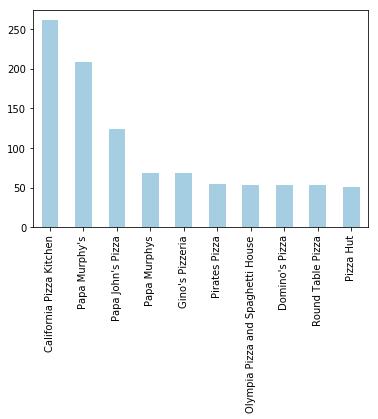

In [23]:
dfname.plot.bar(stacked=True, colormap='Paired')

# Analysis of  menus name Data

In [27]:
menus_name = df['menus.name'].dropna()

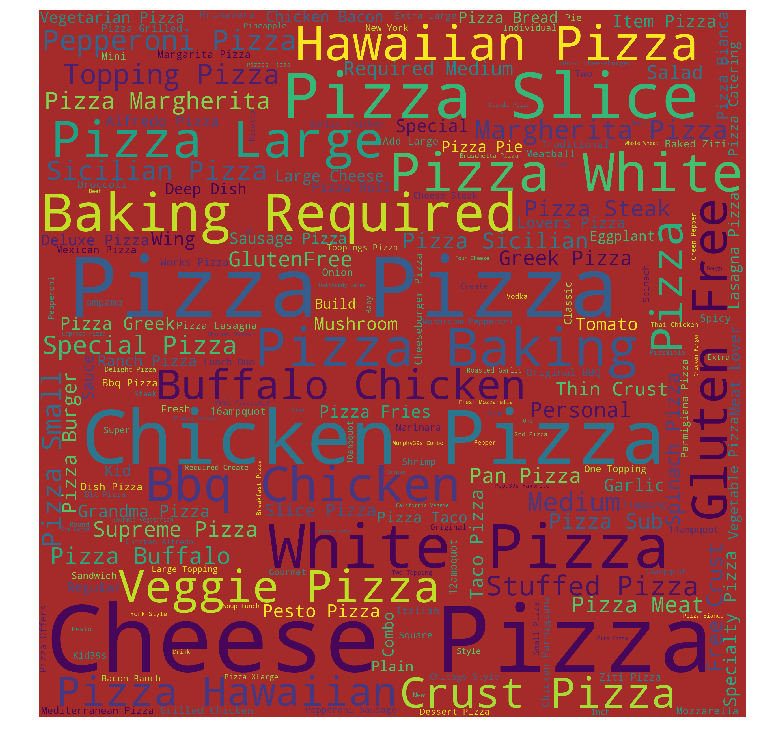

In [28]:
from wordcloud import WordCloud, STOPWORDS

def showWordCloud(data):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = 'brown',
                         width = 2500,
                         height = 2500
                         ).generate(cleaned_word)
    plt.figure(1,figsize = (13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

showWordCloud(menus_name)

In [29]:
menus_name = menus_name.tolist()

In [30]:
# Prepare Stop Words
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [31]:
#Tokenize words and Clean up Text

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(menus_name))

print(data_words[:1])

[['cheese', 'pizza']]


In [32]:
#Creating Bigram and Trigram models
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['cheese', 'pizza']


In [33]:
#Remove Stop words , Make Bigrams and Lemmatize
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
def lemmatization(texts, allowed_postags=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [34]:
# Calling functions

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:4])

[['cheese', 'pizza'], ['pizza', 'cookie'], ['pizza', 'blanca'], ['pizza']]


In [35]:
# Create Dictionary and Corpus needed for Topic Modelling

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1)]]


In [36]:
id2word[0]

'cheese'

In [37]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:3]]

[[('cheese', 1), ('pizza', 1)],
 [('pizza', 1), ('cookie', 1)],
 [('pizza', 1), ('blanca', 1)]]

# Build LDA Model for menus name Data

In [38]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [39]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.727*"pizza" + 0.077*"chicken" + 0.017*"buffalo" + 0.015*"margherita" + '
  '0.011*"wing" + 0.011*"bacon" + 0.008*"roll" + 0.006*"pesto" + 0.006*"sauce" '
  '+ 0.005*"specialty"'),
 (1,
  '0.105*"spinach" + 0.058*"kid" + 0.054*"meatball" + 0.047*"alfredo" + '
  '0.045*"mozzarella" + 0.040*"gourmet" + 0.036*"combo" + 0.034*"parmigiana" + '
  '0.025*"caesar" + 0.023*"size"'),
 (2,
  '0.195*"slice" + 0.119*"meat" + 0.115*"pepperoni" + 0.070*"fry" + '
  '0.042*"item" + 0.031*"lover" + 0.030*"primavera" + 0.013*"dessert" + '
  '0.010*"inch" + 0.010*"cinnamon"'),
 (3,
  '0.075*"burger" + 0.071*"topping" + 0.053*"bread" + 0.049*"pizzaiola" + '
  '0.047*"tomato" + 0.042*"pie" + 0.039*"salad" + 0.038*"style" + '
  '0.034*"sausage" + 0.023*"mushroom"'),
 (4,
  '0.429*"cheese" + 0.088*"crust" + 0.082*"steak" + 0.081*"baking" + '
  '0.073*"sub" + 0.024*"pan" + 0.020*"ricotta" + 0.011*"sheet" + 0.008*"angus" '
  '+ 0.006*"cowboy"')]


In [40]:
# Compute Model Perplexity and Coherence Score

In [41]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -3.8100858474461097

Coherence Score:  0.6661481552051862


In [42]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.422872  0.015105       1        1  64.948944
4      0.088310 -0.347853       2        1  11.568151
2      0.110566  0.111677       3        1   8.844601
3      0.111948  0.120564       4        1   8.767378
1      0.112047  0.100506       5        1   5.870918, topic_info=    Category         Freq          Term        Total  loglift  logprob
1    Default  9917.000000         pizza  9917.000000  30.0000  30.0000
0    Default  1044.000000        cheese  1044.000000  29.0000  29.0000
18   Default   363.000000         slice   363.000000  28.0000  28.0000
22   Default   222.000000          meat   222.000000  27.0000  27.0000
54   Default   214.000000     pepperoni   214.000000  26.0000  26.0000
38   Default   213.000000         crust   213.000000  25.0000  25.0000
120  Default   200.000000         steak   200.000000  24.0000  24.0000
11   Default  1049.000000       chicken  1049.000000  23.0000  23.0000
55   Default   196.000000        baking   196.000000  22.0000  22.0000
4    Default   177.000000           sub   177.000000  21.0000  21.0000
72   Default   129.000000       spinach   129.000000  20.0000  20.0000
79   Default   138.000000        burger   138.000000  19.0000  19.0000
34   Default   132.000000       topping   132.000000  18.0000  18.0000
9    Default   131.000000           fry   131.000000  17.0000  17.0000
144  Default    98.000000         bread    98.000000  16.0000  16.0000
64   Default    91.000000     pizzaiola    91.000000  15.0000  15.0000
43   Default    86.000000        tomato    86.000000  14.0000  14.0000
5    Default    72.000000           kid    72.000000  13.0000  13.0000
252  Default    79.000000          item    79.000000  12.0000  12.0000
51   Default    67.000000      meatball    67.000000  11.0000  11.0000
32   Default    77.000000           pie    77.000000  10.0000  10.0000
73   Default    71.000000         salad    71.000000   9.0000   9.0000
66   Default    71.000000         style    71.000000   8.0000   8.0000
105  Default    58.000000       alfredo    58.000000   7.0000   7.0000
75   Default    56.000000    mozzarella    56.000000   6.0000   6.0000
69   Default    63.000000       sausage    63.000000   5.0000   5.0000
21   Default    59.000000         lover    59.000000   4.0000   4.0000
95   Default    49.000000       gourmet    49.000000   3.0000   3.0000
103  Default    56.000000     primavera    56.000000   2.0000   2.0000
61   Default    45.000000         combo    45.000000   1.0000   1.0000
..       ...          ...           ...          ...      ...      ...
5     Topic5    71.502174           kid    72.324013   2.8237  -2.8480
51    Topic5    66.367294      meatball    67.193794   2.8228  -2.9225
105   Topic5    57.835796       alfredo    58.652912   2.8211  -3.0601
75    Topic5    55.592606    mozzarella    56.413658   2.8205  -3.0997
95    Topic5    48.795712       gourmet    49.612705   2.8186  -3.2301
61    Topic5    44.943192         combo    45.757843   2.8172  -3.3123
195   Topic5    42.270226    parmigiana    43.090343   2.8159  -3.3736
121   Topic5    31.446239        caesar    32.322758   2.8077  -3.6694
59    Topic5    28.949215          size    29.775558   2.8070  -3.7522
62    Topic5    26.008698        murphy    26.826897   2.8042  -3.8593
173   Topic5    22.020845          deal    22.851324   2.7981  -4.0257
206   Topic5    20.765207        fajita    21.608538   2.7953  -4.0844
214   Topic5    16.948139         lunch    17.754999   2.7887  -4.2876
190   Topic5    16.622904       marsala    17.454559   2.7863  -4.3069
292   Topic5    15.980185     artichoke    16.796692   2.7853  -4.3464
217   Topic5    18.033236          meal    18.973843   2.7843  -4.2255
74    Topic5    15.805262      marinara    16.630934   2.7842  -4.3574
58    Topic5    14.620965        family    15.437553   2.7808  -4.4353
29    Topic5    11.944106    

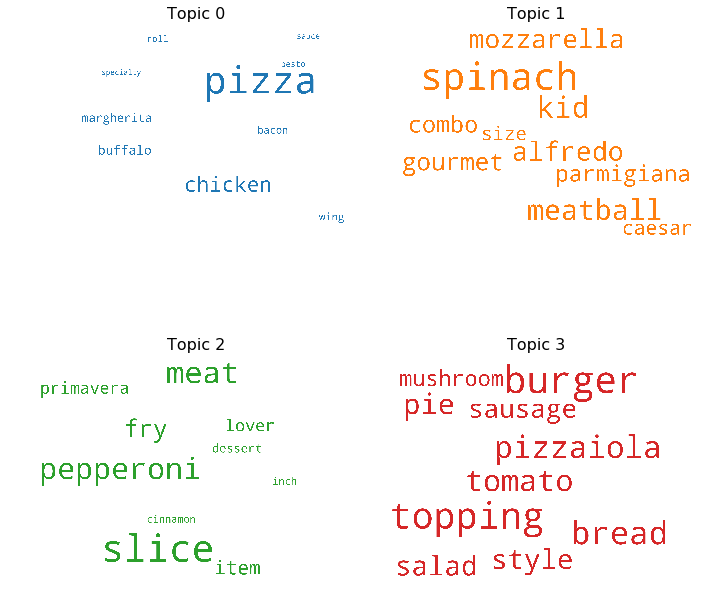

In [43]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Hyperparameter Tuning - Number of Topics and Alpha

In [44]:
# compute coherence value at various values of alpha and num_topics
def compute_coherence_values(dictionary, corpus, texts, num_topics_range, alpha_range):
    
    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics, 
                                               alpha=alpha,
                                               per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append((alpha, num_topics, coherencemodel.get_coherence()))
        

    return model_list, coherence_values

In [45]:
# build models across a range of num_topics and alpha
num_topics_range = [2, 6, 10, 15, 20]
alpha_range = [0.01, 0.1, 0.001]
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        num_topics_range=num_topics_range, 
                                                        alpha_range=alpha_range)

In [46]:
coherence_df = pd.DataFrame(coherence_values, columns=['alpha', 'num_topics', 'coherence_value'])
coherence_df

,alpha,num_topics,coherence_value
0,0.010,2,0.553786
1,0.010,6,0.614617
2,0.010,10,0.618728
3,0.010,15,0.618878
4,0.010,20,0.611274
5,0.100,2,0.558895
6,0.100,6,0.584661
7,0.100,10,0.610421
8,0.100,15,0.608267
9,0.100,20,0.605332


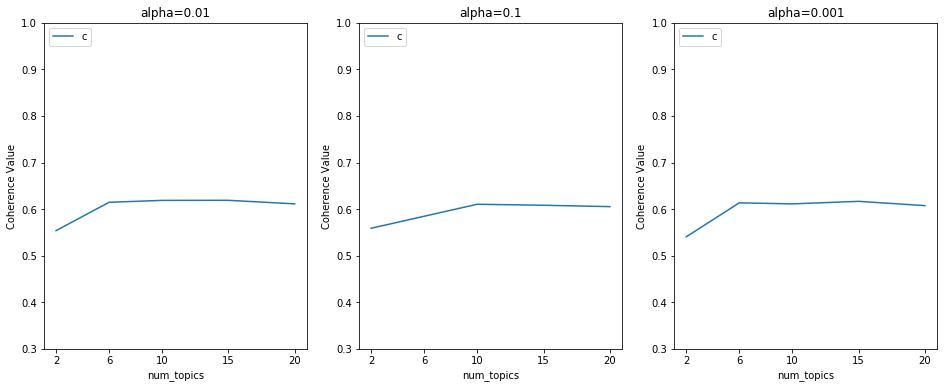

In [47]:
# plot
def plot_coherence(coherence_df, alpha_range, num_topics_range):
    plt.figure(figsize=(16,6))

    for i, val in enumerate(alpha_range):

        # subplot 1/3/i
        plt.subplot(1, 3, i+1)
        alpha_subset = coherence_df[coherence_df['alpha']==val]

        plt.plot(alpha_subset["num_topics"], alpha_subset["coherence_value"])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title("alpha={0}".format(val))
        plt.ylim([0.30, 1])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)

plot_coherence(coherence_df, alpha_range, num_topics_range)

In [48]:
# Build LDA model with alpha=0.1 and 10 topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.1,
                                           per_word_topics=True)

In [49]:
# print keywords 
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.371*"pizza" + 0.207*"wing" + 0.096*"item" + 0.092*"specialty" + '
  '0.067*"cheeseburger" + 0.030*"dessert" + 0.021*"family" + 0.010*"more" + '
  '0.006*"order" + 0.003*"apple"'),
 (1,
  '0.001*"roma" + 0.001*"party" + 0.001*"breakfast" + 0.001*"kitchen" + '
  '0.001*"deal" + 0.001*"popeye" + 0.001*"appetizer" + 0.001*"fritta" + '
  '0.001*"combination" + 0.001*"sampler"'),
 (2,
  '0.503*"slice" + 0.376*"pizza" + 0.007*"sicilian" + 0.001*"grandpa" + '
  '0.000*"inch" + 0.000*"party" + 0.000*"tray" + 0.000*"oz" + 0.000*"pick" + '
  '0.000*"wheat"'),
 (3,
  '0.241*"steak" + 0.231*"pizza" + 0.165*"bacon" + 0.102*"pizzaiola" + '
  '0.075*"ranch" + 0.042*"veal" + 0.036*"cheddar" + 0.022*"angus" + '
  '0.000*"hoagie" + 0.000*"scallopini"'),
 (4,
  '0.522*"cheese" + 0.443*"pizza" + 0.000*"goat" + 0.000*"mac" + '
  '0.000*"monster" + 0.000*"party" + 0.000*"world" + 0.000*"king" + '
  '0.000*"murph" + 0.000*"honey"'),
 (5,
  '0.772*"pizza" + 0.031*"crust" + 0.028*"baking" + 0.026*"pep

In [50]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.369331635928896

Coherence Score:  0.6061328601757014


In [51]:
coherence_model_lda.get_coherence_per_topic()

[0.5518349746081872,
 0.7655668254847467,
 0.5741755029091753,
 0.5458431012773104,
 0.6556437988679635,
 0.6050378692230742,
 0.7655668254847467,
 0.5610802546174158,
 0.6088193801574884,
 0.5349261143696371,
 0.6196165270295442,
 0.6627126148552281,
 0.554927204821124,
 0.470458404847805,
 0.6157835040820734]

In [52]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.255203 -0.017583       1        1  25.728983
10     0.186143 -0.025127       2        1  11.871588
4      0.201791 -0.017095       3        1   8.787305
12     0.110195 -0.027628       4        1   6.235968
8      0.046555 -0.030526       5        1   5.403442
2      0.077715 -0.027367       6        1   5.237032
0      0.080122 -0.029234       7        1   5.218168
3      0.047847  0.319291       8        1   5.213711
7      0.074005 -0.029293       9        1   5.173134
9      0.051015 -0.030514      10        1   4.281268
14     0.002207 -0.029302      11        1   3.810017
13    -0.376576 -0.007646      12        1   3.690291
11    -0.029133 -0.030679      13        1   3.500846
1     -0.363545 -0.008648      14        1   2.924126
6     -0.363545 -0.008648      15        1   2.924125, topic_info=     Category         Freq           Term        Total  loglift  logprob
0     Default   967.000000         cheese   967.000000  30.0000  30.0000
11    Default   830.000000        chicken   830.000000  29.0000  29.0000
1     Default  9195.000000          pizza  9195.000000  28.0000  28.0000
18    Default   555.000000          slice   555.000000  27.0000  27.0000
34    Default   286.000000        topping   286.000000  26.0000  26.0000
22    Default   315.000000           meat   315.000000  25.0000  25.0000
9     Default   272.000000            fry   272.000000  24.0000  24.0000
120   Default   266.000000          steak   266.000000  23.0000  23.0000
20    Default   265.000000     margherita   265.000000  22.0000  22.0000
41    Default   229.000000           wing   229.000000  21.0000  21.0000
10    Default   183.000000          bacon   183.000000  20.0000  20.0000
43    Default   170.000000         tomato   170.000000  19.0000  19.0000
32    Default   153.000000            pie   153.000000  18.0000  18.0000
44    Default   151.000000           roll   151.000000  17.0000  17.0000
42    Default   123.000000          sauce   123.000000  16.0000  16.0000
13    Default   188.000000        buffalo   188.000000  15.0000  15.0000
5     Default   120.000000            kid   120.000000  14.0000  14.0000
64    Default   114.000000      pizzaiola   114.000000  13.0000  13.0000
8     Default    94.000000       sandwich    94.000000  12.0000  12.0000
252   Default   107.000000           item   107.000000  11.0000  11.0000
95    Default   105.000000        gourmet   105.000000  10.0000  10.0000
4     Default   152.000000            sub   152.000000   9.0000   9.0000
40    Default   103.000000      specialty   103.000000   8.0000   8.0000
75    Default    92.000000     mozzarella    92.000000   7.0000   7.0000
17    Default    85.000000           soda    85.000000   6.0000   6.0000
73    Default    95.000000          salad    95.000000   5.0000   5.0000
147   Default    79.000000        ricotta    79.000000   4.0000   4.0000
146   Default    85.000000          ranch    85.000000   3.0000   3.0000
21    Default    84.000000          lover    84.000000   2.0000   2.0000
37    Default    75.000000   cheeseburger    75.000000   1.0000   1.0000
...       ...          ...            ...          ...      ...      ...
210   Topic15     0.546654       flagship     2.693103   1.9375  -7.0246
841   Topic15     0.546672         popeye     2.693621   1.9374  -7.0246
508   Topic15     0.546658         blanco     2.693242   1.9375  -7.0246
933   Topic15     0.546649    masterpiece     2.693004   1.9376  -7.0246
208   Topic15     0.546668         fritta     2.693549   1.9374  -7.0246
1004  Topic15     0.546646            one     2.692924   1.9376  -7.0246
597   Topic15     0.546663       mexicana     2.693452   1.9374  -7.0246
1122  Topic15     0.546646          march     2.692930   1.9376  -7.0246
1121  Topic15     0.546646        madness     2.692930   1.9376  -7.0246
1120  Topic15     0.546646         yankee     

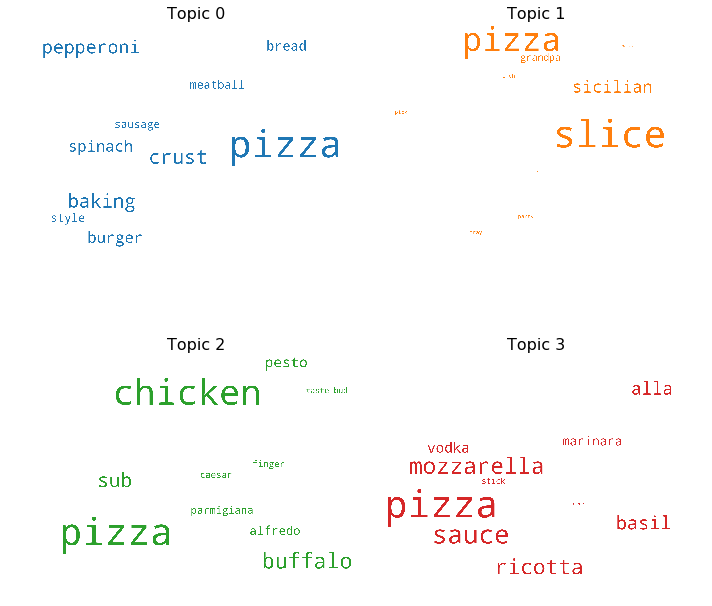

In [53]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()